In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi # Tesla P100이 출력되지 않으면 "런타임 초기화"

Mon May 23 03:36:27 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cu113 True


In [ ]:
# Install MMCV
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 46.6 MB 132 kB/s 
     |████████████████████████████████| 190 kB 5.2 MB/s 


In [ ]:
!rm -rf mmsegmentation
!git clone https://github.com/museonghwang/mmsegmentation.git
#!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 7003, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 7003 (delta 0), reused 8 (delta 0), pack-reused 6986
Receiving objects: 100% (7003/7003), 12.84 MiB | 30.01 MiB/s, done.
Resolving deltas: 100% (5180/5180), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
     |████████████████████████████████| 572 kB 5.3 MB/s 
     |████████████████████████████████| 631 kB 60.0 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=3397cfc4727839b5da5f130b39c9b681cd7b1b4cd8492bdea0204933e5902204
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalli

In [ ]:
# 런타임 -> 런타임 "다시 시작" 후 아래 수행. 
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.11.0+cu113 True
0.24.1


# Run Inference with MMSeg trained weight

In [ ]:
%cd mmsegmentation
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth -P checkpoints

/content/mmsegmentation
--2022-05-25 08:39:20--  https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.28
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328290585 (313M) [application/octet-stream]
Saving to: ‘checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth’

segformer_mit-b5_8x 100%[===================>] 313.08M  8.56MB/s    in 38s     

2022-05-25 08:39:59 (8.34 MB/s) - ‘checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth’ saved [328290585/328290585]



In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [ ]:
config_file = '/content/mmsegmentation/configs/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes.py'
checkpoint_file = '/content/mmsegmentation/checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth'

In [ ]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: /content/mmsegmentation/checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth


In [ ]:
# test a single image
img = '/content/mmsegmentation/demo/demo.png'
result = inference_segmentor(model, img)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


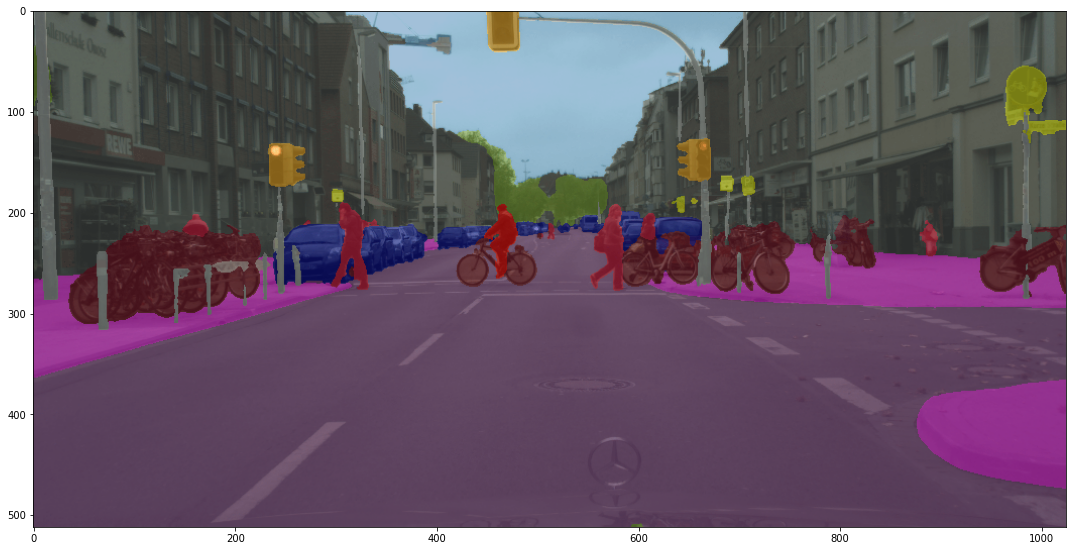

In [ ]:
# show the results
show_result_pyplot(model, img, result, get_palette('cityscapes'))

## Train a semantic segmentation model on a new dataset

To train on a customized dataset, the following steps are necessary. 
1. Add a new dataset class. 
2. Create a config file accordingly. 
3. Perform training and evaluation. 

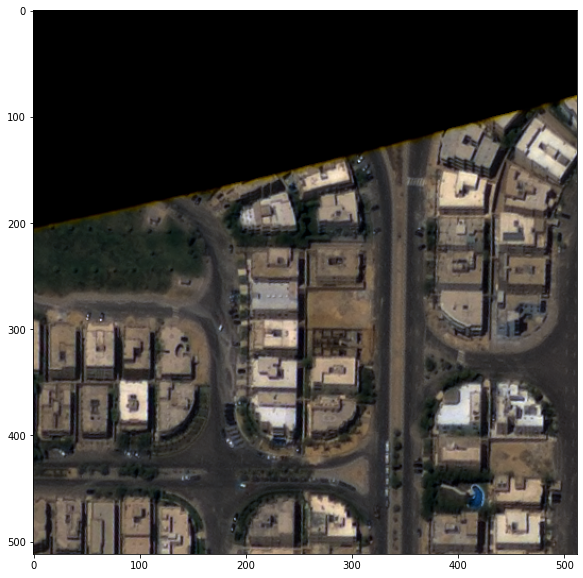

In [ ]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/cropped/train/road/image/BLD00001_PS3_K3A_NIA0276_00.png')
plt.figure(figsize=(10, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
import os.path as osp
import numpy as np
from PIL import Image
import cv2

# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/cropped/train/road'
img_dir = 'image'
ann_dir = 'annotation'

# define class and plaette for better visualization
classes = ('background', 'road')
palette = [[0, 0, 0], [255, 0, 255]]

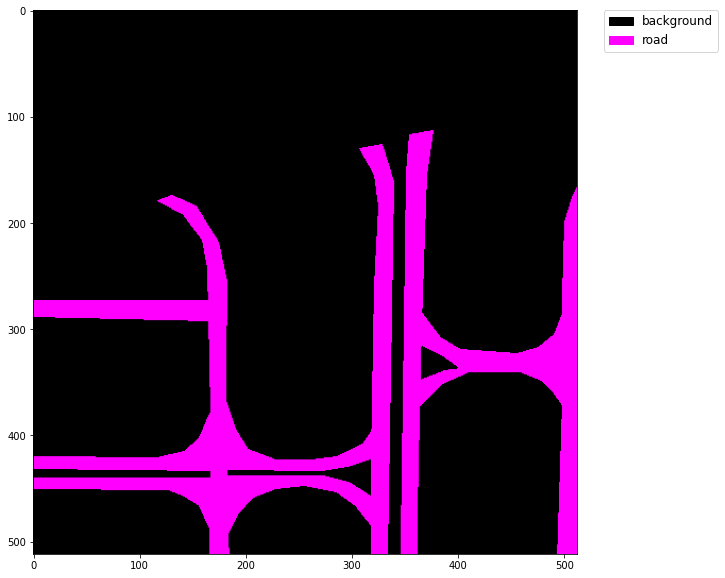

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches

img = Image.open('/content/drive/Shareddrives/msmg/level1/cropped/train/road/annotation/BLD00001_PS3_K3A_NIA0276_00.png')
plt.figure(figsize=(10, 10))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(2)]

# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

plt.show()

# Create a config file
In the next step, we need to modify the config for the training. To accelerate the process, we finetune the model from trained weights.

In [ ]:
config_file = '/content/mmsegmentation/configs/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes.py'
checkpoint_file = '/content/mmsegmentation/checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth'
save_pth_path = '/content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint'

In [ ]:

# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road'
img_dir = 'image'
ann_dir = 'contoured_wo5'

# define class and plaette for better visualization
classes = ('background', 'road', 'contour')
palette = [[0, 0, 0], [255, 0, 255],[0,0,255]]

In [ ]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module(force=True)
class RoadSemanticSegmentation(CustomDataset):
    CLASSES = classes
    PALETTE = palette
    def __init__(self, split, **kwargs):
        super().__init__(img_suffix='.png', seg_map_suffix='.png', split=split, **kwargs)
        assert osp.exists(self.img_dir) and self.split is not None

In [ ]:
from mmcv import Config

cfg = Config.fromfile(config_file)

In [ ]:
from mmseg.apis import set_random_seed

# add CLASSES and PALETTE to checkpoint
cfg.checkpoint_config.meta = dict(
    CLASSES=classes,
    PALETTE=palette)

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
#cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg

# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 3

# modify loss function crossentropy
cfg.model.decode_head.loss_decode = dict(type='CrossEntropyLoss', class_weight=[1, 2, 3], use_sigmoid=False, loss_weight=1.0)

#cfg.model.test_cfg.mode = 'whole'
#del cfg['model']['test_cfg']['crop_size']
#del cfg['model']['test_cfg']['stride']

# Modify dataset type and path
cfg.dataset_type = 'RoadSemanticSegmentation'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 4
cfg.data.workers_per_gpu = 4


# Albumentations transforms settings
albu_train_transforms = [
    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomRotate90', p=1.0)
    ], p=0.5),

    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomBrightnessContrast',brightness_limit=0.1, contrast_limit=0.15, p=1.0),
        dict(type='CLAHE', clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=1.0),
        dict(type='HueSaturationValue', hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=10, p=1.0),
    ], p=0.5)
]

# pipline
cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (512, 512)
# cfg.image_scale = (512, 512)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.5, 1.5)),
    # dict(type='Resize', keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Albu',
        transforms=albu_train_transforms,
        keymap=dict(img='image', gt_semantic_seg='mask'),
        update_pad_shape=True,
        ),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=(512,512), pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),            
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road/'
cfg.data.train.img_dir = 'image'
cfg.data.train.ann_dir = 'contoured_wo5'
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'split/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.val.img_dir = 'image'
cfg.data.val.ann_dir = 'contoured_wo5'
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'split/validation.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.test.img_dir = 'image'
cfg.data.test.ann_dir = 'contoured_wo5'
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'split/validation.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = save_pth_path

cfg.runner.max_iters = 10000
cfg.log_config.interval = 10
cfg.evaluation.interval = 200
cfg.evaluation.save_best = 'mIoU'
cfg.checkpoint_config.interval = 2000

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained=None,
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=64,
        num_stages=4,
        num_layers=[3, 6, 40, 3],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1,
        init_cfg=dict(type='Pretrained', checkpoint='pretrain/mit_b5.pth')),
    decode_head=dict(
        type='SegformerHead',
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        channels=256,
        dropout_ratio=0.1,
        num_classes=3,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss',
            class_weight=[1, 2, 3],
            use

# Train and Evaluation

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

In [ ]:
# Build the detector
model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


In [ ]:
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, meta=dict())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-23 03:38:39,064 - mmseg - INFO - Loaded 127 images
2022-05-23 03:38:39,067 - mmseg - INFO - load checkpoint from local path: /content/mmsegmentation/checkpoints/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth
2022-05-23 03:38:39,724 - mmseg - WARNING - The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([3, 256, 1, 1]).
size mismatch for decode

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 1.3 task/s, elapsed: 94s, ETA:     0s

2022-05-23 03:44:41,636 - mmseg - INFO - per class results:
2022-05-23 03:44:41,638 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 87.73 | 94.95 |
|    road    |  1.81 |  1.83 |
|  contour   | 25.91 | 47.65 |
+------------+-------+-------+
2022-05-23 03:44:41,640 - mmseg - INFO - Summary:
2022-05-23 03:44:41,647 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 85.47 | 38.48 | 48.14 |
+-------+-------+-------+
2022-05-23 03:44:50,411 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_200.pth.
2022-05-23 03:44:50,413 - mmseg - INFO - Best mIoU is 0.3848 at 200 iter.
2022-05-23 03:44:50,419 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8547, mIoU: 0.3848, mAcc: 0.4814, IoU.background: 0.8773, IoU.road: 0.0181, IoU.contour: 0.2591, Acc.background: 0.9495, Acc.road: 0.0183, Acc.contour: 0.4765
2022-05-23 03:45:03,287 - mmseg - INFO - Iter [210/10000]	lr: 8.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 03:49:41,758 - mmseg - INFO - per class results:
2022-05-23 03:49:41,761 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 90.09 | 94.39 |
|    road    | 30.92 |  37.3 |
|  contour   | 32.97 |  58.3 |
+------------+-------+-------+
2022-05-23 03:49:41,768 - mmseg - INFO - Summary:
2022-05-23 03:49:41,771 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 87.95 | 51.33 | 63.33 |
+-------+-------+-------+
2022-05-23 03:49:41,785 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_200.pth was removed
2022-05-23 03:49:49,664 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_400.pth.
2022-05-23 03:49:49,666 - mmseg - INFO - Best mIoU is 0.5133 at 400 iter.
2022-05-23 03:49:49,672 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8795, mIoU: 0.5133, mAcc: 0.6

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 03:54:38,494 - mmseg - INFO - per class results:
2022-05-23 03:54:38,496 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  87.9 | 90.25 |
|    road    | 36.49 | 54.36 |
|  contour   | 32.92 |  65.9 |
+------------+-------+-------+
2022-05-23 03:54:38,503 - mmseg - INFO - Summary:
2022-05-23 03:54:38,505 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 86.06 | 52.44 | 70.17 |
+-------+-------+-------+
2022-05-23 03:54:38,523 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_400.pth was removed
2022-05-23 03:54:46,431 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_600.pth.
2022-05-23 03:54:46,433 - mmseg - INFO - Best mIoU is 0.5244 at 600 iter.
2022-05-23 03:54:46,443 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8606, mIoU: 0.5244, mAcc: 0.7

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 03:59:32,451 - mmseg - INFO - per class results:
2022-05-23 03:59:32,454 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 89.81 | 92.49 |
|    road    | 39.59 |  54.4 |
|  contour   | 35.37 | 65.01 |
+------------+-------+-------+
2022-05-23 03:59:32,456 - mmseg - INFO - Summary:
2022-05-23 03:59:32,459 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 87.89 | 54.92 | 70.63 |
+-------+-------+-------+
2022-05-23 03:59:32,477 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_600.pth was removed
2022-05-23 03:59:40,676 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_800.pth.
2022-05-23 03:59:40,707 - mmseg - INFO - Best mIoU is 0.5492 at 800 iter.
2022-05-23 03:59:40,712 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8789, mIoU: 0.5492, mAcc: 0.7

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 04:04:29,707 - mmseg - INFO - per class results:
2022-05-23 04:04:29,709 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.49 | 94.72 |
|    road    | 40.79 | 50.71 |
|  contour   | 38.16 | 64.33 |
+------------+-------+-------+
2022-05-23 04:04:29,710 - mmseg - INFO - Summary:
2022-05-23 04:04:29,716 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.53 | 56.81 | 69.92 |
+-------+-------+-------+
2022-05-23 04:04:29,731 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_800.pth was removed
2022-05-23 04:04:37,679 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1000.pth.
2022-05-23 04:04:37,681 - mmseg - INFO - Best mIoU is 0.5681 at 1000 iter.
2022-05-23 04:04:37,687 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8953, mIoU: 0.5681, mAcc: 0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 04:09:26,774 - mmseg - INFO - per class results:
2022-05-23 04:09:26,776 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.11 |  93.7 |
|    road    | 37.48 | 44.66 |
|  contour   | 39.24 | 72.29 |
+------------+-------+-------+
2022-05-23 04:09:26,779 - mmseg - INFO - Summary:
2022-05-23 04:09:26,783 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.02 | 55.94 | 70.22 |
+-------+-------+-------+
2022-05-23 04:09:26,788 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8902, mIoU: 0.5594, mAcc: 0.7022, IoU.background: 0.9111, IoU.road: 0.3748, IoU.contour: 0.3924, Acc.background: 0.9370, Acc.road: 0.4466, Acc.contour: 0.7229
2022-05-23 04:09:38,624 - mmseg - INFO - Iter [1210/10000]	lr: 4.251e-05, eta: 3:44:35, time: 5.930, data_time: 4.759, memory: 9693, decode.loss_ce: 0.4558, decode.acc_seg: 89.5218, loss: 0.4558
2022-05-23 04:09:50,488 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 04:14:11,423 - mmseg - INFO - per class results:
2022-05-23 04:14:11,427 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.19 | 93.92 |
|    road    | 43.17 | 61.82 |
|  contour   | 37.94 | 62.34 |
+------------+-------+-------+
2022-05-23 04:14:11,429 - mmseg - INFO - Summary:
2022-05-23 04:14:11,432 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 89.3 | 57.44 | 72.69 |
+------+-------+-------+
2022-05-23 04:14:11,438 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_1000.pth was removed
2022-05-23 04:14:20,172 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1400.pth.
2022-05-23 04:14:20,175 - mmseg - INFO - Best mIoU is 0.5744 at 1400 iter.
2022-05-23 04:14:20,181 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8930, mIoU: 0.5744, mAcc: 0.726

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 04:19:09,356 - mmseg - INFO - per class results:
2022-05-23 04:19:09,359 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.06 |  95.7 |
|    road    | 41.88 | 52.04 |
|  contour   |  39.5 | 61.87 |
+------------+-------+-------+
2022-05-23 04:19:09,361 - mmseg - INFO - Summary:
2022-05-23 04:19:09,364 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.23 | 57.81 | 69.87 |
+-------+-------+-------+
2022-05-23 04:19:09,379 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_1400.pth was removed
2022-05-23 04:19:17,680 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1600.pth.
2022-05-23 04:19:17,682 - mmseg - INFO - Best mIoU is 0.5781 at 1600 iter.
2022-05-23 04:19:17,688 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9023, mIoU: 0.5781, mAcc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 04:24:06,761 - mmseg - INFO - per class results:
2022-05-23 04:24:06,765 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  90.0 | 92.05 |
|    road    | 41.84 | 56.05 |
|  contour   | 37.76 | 71.58 |
+------------+-------+-------+
2022-05-23 04:24:06,766 - mmseg - INFO - Summary:
2022-05-23 04:24:06,772 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 88.19 | 56.53 | 73.22 |
+-------+-------+-------+
2022-05-23 04:24:06,775 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8819, mIoU: 0.5653, mAcc: 0.7322, IoU.background: 0.9000, IoU.road: 0.4184, IoU.contour: 0.3776, Acc.background: 0.9205, Acc.road: 0.5605, Acc.contour: 0.7158
2022-05-23 04:24:18,620 - mmseg - INFO - Iter [1810/10000]	lr: 4.915e-05, eta: 3:26:15, time: 5.893, data_time: 4.720, memory: 9693, decode.loss_ce: 0.4094, decode.acc_seg: 90.3470, loss: 0.4094
2022-05-23 04:24:30,454 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-23 04:29:11,361 - mmseg - INFO - per class results:
2022-05-23 04:29:11,363 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.94 |  96.5 |
|    road    |  45.7 | 56.53 |
|  contour   | 40.67 | 60.55 |
+------------+-------+-------+
2022-05-23 04:29:11,365 - mmseg - INFO - Summary:
2022-05-23 04:29:11,370 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.04 | 59.77 | 71.19 |
+-------+-------+-------+
2022-05-23 04:29:11,381 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_1600.pth was removed
2022-05-23 04:29:18,189 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_2000.pth.
2022-05-23 04:29:18,190 - mmseg - INFO - Best mIoU is 0.5977 at 2000 iter.
2022-05-23 04:29:18,196 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9104, mIoU: 0.5977, mAcc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 04:34:09,650 - mmseg - INFO - per class results:
2022-05-23 04:34:09,653 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  91.0 | 93.49 |
|    road    | 43.24 | 52.84 |
|  contour   | 39.19 | 71.06 |
+------------+-------+-------+
2022-05-23 04:34:09,655 - mmseg - INFO - Summary:
2022-05-23 04:34:09,659 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 89.2 | 57.81 | 72.47 |
+------+-------+-------+
2022-05-23 04:34:09,662 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8920, mIoU: 0.5781, mAcc: 0.7247, IoU.background: 0.9100, IoU.road: 0.4324, IoU.contour: 0.3919, Acc.background: 0.9349, Acc.road: 0.5284, Acc.contour: 0.7106
2022-05-23 04:34:21,516 - mmseg - INFO - Iter [2210/10000]	lr: 4.675e-05, eta: 3:16:05, time: 5.914, data_time: 4.740, memory: 9693, decode.loss_ce: 0.5543, decode.acc_seg: 86.9098, loss: 0.5543
2022-05-23 04:34:33,378 - mmseg - INFO - Iter

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 04:38:57,288 - mmseg - INFO - per class results:
2022-05-23 04:38:57,291 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.51 | 95.15 |
|    road    | 47.02 | 59.41 |
|  contour   | 41.07 |  66.5 |
+------------+-------+-------+
2022-05-23 04:38:57,295 - mmseg - INFO - Summary:
2022-05-23 04:38:57,303 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 90.58 | 60.2 | 73.69 |
+-------+------+-------+
2022-05-23 04:38:57,318 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_2000.pth was removed
2022-05-23 04:39:05,106 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_2400.pth.
2022-05-23 04:39:05,108 - mmseg - INFO - Best mIoU is 0.6020 at 2400 iter.
2022-05-23 04:39:05,114 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9058, mIoU: 0.6020, mAcc: 0.736

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 04:43:54,286 - mmseg - INFO - per class results:
2022-05-23 04:43:54,288 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.29 | 93.32 |
|    road    | 46.67 | 67.27 |
|  contour   | 38.56 | 65.58 |
+------------+-------+-------+
2022-05-23 04:43:54,294 - mmseg - INFO - Summary:
2022-05-23 04:43:54,298 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 89.38 | 58.84 | 75.39 |
+-------+-------+-------+
2022-05-23 04:43:54,302 - mmseg - INFO - Iter(val) [127]	aAcc: 0.8938, mIoU: 0.5884, mAcc: 0.7539, IoU.background: 0.9129, IoU.road: 0.4667, IoU.contour: 0.3856, Acc.background: 0.9332, Acc.road: 0.6727, Acc.contour: 0.6558
2022-05-23 04:44:06,155 - mmseg - INFO - Iter [2610/10000]	lr: 4.435e-05, eta: 3:05:06, time: 5.905, data_time: 4.730, memory: 9694, decode.loss_ce: 0.4392, decode.acc_seg: 89.5242, loss: 0.4392
2022-05-23 04:44:17,967 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 04:48:37,757 - mmseg - INFO - per class results:
2022-05-23 04:48:37,761 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.09 | 94.65 |
|    road    | 46.95 | 59.62 |
|  contour   | 40.63 | 67.47 |
+------------+-------+-------+
2022-05-23 04:48:37,765 - mmseg - INFO - Summary:
2022-05-23 04:48:37,768 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.25 | 59.89 | 73.91 |
+-------+-------+-------+
2022-05-23 04:48:37,772 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9025, mIoU: 0.5989, mAcc: 0.7391, IoU.background: 0.9209, IoU.road: 0.4695, IoU.contour: 0.4063, Acc.background: 0.9465, Acc.road: 0.5962, Acc.contour: 0.6747
2022-05-23 04:48:49,633 - mmseg - INFO - Iter [2810/10000]	lr: 4.315e-05, eta: 2:59:21, time: 5.879, data_time: 4.704, memory: 9694, decode.loss_ce: 0.4981, decode.acc_seg: 88.9378, loss: 0.4981
2022-05-23 04:49:01,454 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 04:53:25,208 - mmseg - INFO - per class results:
2022-05-23 04:53:25,212 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.87 | 95.76 |
|    road    | 45.95 | 55.83 |
|  contour   | 42.24 | 66.95 |
+------------+-------+-------+
2022-05-23 04:53:25,214 - mmseg - INFO - Summary:
2022-05-23 04:53:25,217 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.94 | 60.35 | 72.85 |
+-------+-------+-------+
2022-05-23 04:53:25,231 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_2400.pth was removed
2022-05-23 04:53:32,666 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_3000.pth.
2022-05-23 04:53:32,668 - mmseg - INFO - Best mIoU is 0.6035 at 3000 iter.
2022-05-23 04:53:32,681 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9094, mIoU: 0.6035, mAcc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 04:58:20,834 - mmseg - INFO - per class results:
2022-05-23 04:58:20,838 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.32 | 95.01 |
|    road    | 47.53 | 63.11 |
|  contour   | 40.41 | 64.09 |
+------------+-------+-------+
2022-05-23 04:58:20,840 - mmseg - INFO - Summary:
2022-05-23 04:58:20,844 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.46 | 60.09 | 74.07 |
+-------+-------+-------+
2022-05-23 04:58:20,847 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9046, mIoU: 0.6009, mAcc: 0.7407, IoU.background: 0.9232, IoU.road: 0.4753, IoU.contour: 0.4041, Acc.background: 0.9501, Acc.road: 0.6311, Acc.contour: 0.6409
2022-05-23 04:58:32,687 - mmseg - INFO - Iter [3210/10000]	lr: 4.075e-05, eta: 2:48:49, time: 5.884, data_time: 4.712, memory: 9694, decode.loss_ce: 0.5121, decode.acc_seg: 87.6848, loss: 0.5121
2022-05-23 04:58:44,555 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 05:03:04,887 - mmseg - INFO - per class results:
2022-05-23 05:03:04,895 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.25 | 94.65 |
|    road    | 45.85 | 60.76 |
|  contour   | 41.81 | 68.06 |
+------------+-------+-------+
2022-05-23 05:03:04,896 - mmseg - INFO - Summary:
2022-05-23 05:03:04,898 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.37 | 59.97 | 74.49 |
+-------+-------+-------+
2022-05-23 05:03:04,903 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9037, mIoU: 0.5997, mAcc: 0.7449, IoU.background: 0.9225, IoU.road: 0.4585, IoU.contour: 0.4181, Acc.background: 0.9465, Acc.road: 0.6076, Acc.contour: 0.6806
2022-05-23 05:03:16,719 - mmseg - INFO - Iter [3410/10000]	lr: 3.955e-05, eta: 2:43:23, time: 5.887, data_time: 4.718, memory: 9694, decode.loss_ce: 0.4206, decode.acc_seg: 90.5072, loss: 0.4206
2022-05-23 05:03:28,563 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 05:07:52,885 - mmseg - INFO - per class results:
2022-05-23 05:07:52,889 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.21 | 94.49 |
|    road    | 49.03 | 66.44 |
|  contour   | 40.36 | 65.58 |
+------------+-------+-------+
2022-05-23 05:07:52,893 - mmseg - INFO - Summary:
2022-05-23 05:07:52,897 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 90.34 | 60.53 | 75.5 |
+-------+-------+------+
2022-05-23 05:07:52,910 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_3000.pth was removed
2022-05-23 05:08:00,436 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_3600.pth.
2022-05-23 05:08:00,439 - mmseg - INFO - Best mIoU is 0.6053 at 3600 iter.
2022-05-23 05:08:00,442 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9034, mIoU: 0.6053, mAcc: 0.755

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 05:12:49,884 - mmseg - INFO - per class results:
2022-05-23 05:12:49,887 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.83 | 93.96 |
|    road    | 48.71 | 61.59 |
|  contour   | 40.47 | 70.15 |
+------------+-------+-------+
2022-05-23 05:12:49,897 - mmseg - INFO - Summary:
2022-05-23 05:12:49,899 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.01 | 60.33 | 75.23 |
+-------+-------+-------+
2022-05-23 05:12:49,903 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9001, mIoU: 0.6033, mAcc: 0.7523, IoU.background: 0.9183, IoU.road: 0.4871, IoU.contour: 0.4047, Acc.background: 0.9396, Acc.road: 0.6159, Acc.contour: 0.7015
2022-05-23 05:13:01,788 - mmseg - INFO - Iter [3810/10000]	lr: 3.715e-05, eta: 2:33:12, time: 5.921, data_time: 4.743, memory: 9694, decode.loss_ce: 0.4896, decode.acc_seg: 87.3106, loss: 0.4896
2022-05-23 05:13:13,643 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 48s, ETA:     0s

2022-05-23 05:17:55,639 - mmseg - INFO - per class results:
2022-05-23 05:17:55,645 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.25 | 94.45 |
|    road    |  49.8 | 67.72 |
|  contour   | 39.69 | 64.82 |
+------------+-------+-------+
2022-05-23 05:17:55,650 - mmseg - INFO - Summary:
2022-05-23 05:17:55,652 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.31 | 60.58 | 75.67 |
+-------+-------+-------+
2022-05-23 05:17:55,662 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_3600.pth was removed
2022-05-23 05:18:02,162 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_4000.pth.
2022-05-23 05:18:02,164 - mmseg - INFO - Best mIoU is 0.6058 at 4000 iter.
2022-05-23 05:18:02,174 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9031, mIoU: 0.6058, mAcc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 05:22:52,211 - mmseg - INFO - per class results:
2022-05-23 05:22:52,214 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.31 | 96.45 |
|    road    |  47.5 |  57.6 |
|  contour   |  42.5 | 64.23 |
+------------+-------+-------+
2022-05-23 05:22:52,223 - mmseg - INFO - Summary:
2022-05-23 05:22:52,227 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 91.39 | 61.1 | 72.76 |
+-------+------+-------+
2022-05-23 05:22:52,248 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_4000.pth was removed
2022-05-23 05:22:59,910 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_4200.pth.
2022-05-23 05:22:59,912 - mmseg - INFO - Best mIoU is 0.6110 at 4200 iter.
2022-05-23 05:22:59,923 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9139, mIoU: 0.6110, mAcc: 0.727

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 05:27:49,421 - mmseg - INFO - per class results:
2022-05-23 05:27:49,423 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.52 | 94.98 |
|    road    | 44.51 | 52.28 |
|  contour   | 42.77 | 72.52 |
+------------+-------+-------+
2022-05-23 05:27:49,425 - mmseg - INFO - Summary:
2022-05-23 05:27:49,426 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.57 | 59.93 | 73.26 |
+-------+-------+-------+
2022-05-23 05:27:49,429 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9057, mIoU: 0.5993, mAcc: 0.7326, IoU.background: 0.9252, IoU.road: 0.4451, IoU.contour: 0.4277, Acc.background: 0.9498, Acc.road: 0.5228, Acc.contour: 0.7252
2022-05-23 05:28:01,304 - mmseg - INFO - Iter [4410/10000]	lr: 3.355e-05, eta: 2:18:32, time: 5.934, data_time: 4.759, memory: 9694, decode.loss_ce: 0.4792, decode.acc_seg: 88.5315, loss: 0.4792
2022-05-23 05:28:13,152 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 05:32:37,915 - mmseg - INFO - per class results:
2022-05-23 05:32:37,921 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  92.5 | 94.68 |
|    road    | 49.78 |  63.7 |
|  contour   | 41.74 | 68.86 |
+------------+-------+-------+
2022-05-23 05:32:37,924 - mmseg - INFO - Summary:
2022-05-23 05:32:37,928 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.64 | 61.34 | 75.75 |
+-------+-------+-------+
2022-05-23 05:32:37,947 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_4200.pth was removed
2022-05-23 05:32:45,610 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_4600.pth.
2022-05-23 05:32:45,613 - mmseg - INFO - Best mIoU is 0.6134 at 4600 iter.
2022-05-23 05:32:45,616 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9064, mIoU: 0.6134, mAcc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 05:37:31,479 - mmseg - INFO - per class results:
2022-05-23 05:37:31,483 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  92.5 | 94.98 |
|    road    | 49.84 | 67.18 |
|  contour   | 40.33 |  63.6 |
+------------+-------+-------+
2022-05-23 05:37:31,485 - mmseg - INFO - Summary:
2022-05-23 05:37:31,494 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.62 | 60.89 | 75.25 |
+-------+-------+-------+
2022-05-23 05:37:31,496 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9062, mIoU: 0.6089, mAcc: 0.7525, IoU.background: 0.9250, IoU.road: 0.4984, IoU.contour: 0.4033, Acc.background: 0.9498, Acc.road: 0.6718, Acc.contour: 0.6360
2022-05-23 05:37:43,391 - mmseg - INFO - Iter [4810/10000]	lr: 3.115e-05, eta: 2:08:23, time: 5.944, data_time: 4.767, memory: 9694, decode.loss_ce: 0.4959, decode.acc_seg: 88.5290, loss: 0.4959
2022-05-23 05:37:55,240 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 05:42:19,567 - mmseg - INFO - per class results:
2022-05-23 05:42:19,571 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.33 |  94.6 |
|    road    | 46.61 | 60.67 |
|  contour   | 42.23 | 69.58 |
+------------+-------+-------+
2022-05-23 05:42:19,573 - mmseg - INFO - Summary:
2022-05-23 05:42:19,577 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.45 | 60.39 | 74.95 |
+-------+-------+-------+
2022-05-23 05:42:19,581 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9045, mIoU: 0.6039, mAcc: 0.7495, IoU.background: 0.9233, IoU.road: 0.4661, IoU.contour: 0.4223, Acc.background: 0.9460, Acc.road: 0.6067, Acc.contour: 0.6958
2022-05-23 05:42:31,451 - mmseg - INFO - Iter [5010/10000]	lr: 2.995e-05, eta: 2:03:18, time: 5.910, data_time: 4.735, memory: 9694, decode.loss_ce: 0.4792, decode.acc_seg: 88.5396, loss: 0.4792
2022-05-23 05:42:43,315 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 05:47:07,686 - mmseg - INFO - per class results:
2022-05-23 05:47:07,691 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.78 | 95.18 |
|    road    |  48.2 | 63.09 |
|  contour   | 42.37 |  67.1 |
+------------+-------+-------+
2022-05-23 05:47:07,692 - mmseg - INFO - Summary:
2022-05-23 05:47:07,702 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.87 | 61.12 | 75.12 |
+-------+-------+-------+
2022-05-23 05:47:07,706 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9087, mIoU: 0.6112, mAcc: 0.7512, IoU.background: 0.9278, IoU.road: 0.4820, IoU.contour: 0.4237, Acc.background: 0.9518, Acc.road: 0.6309, Acc.contour: 0.6710
2022-05-23 05:47:19,597 - mmseg - INFO - Iter [5210/10000]	lr: 2.875e-05, eta: 1:58:13, time: 5.927, data_time: 4.750, memory: 9694, decode.loss_ce: 0.4434, decode.acc_seg: 89.9521, loss: 0.4434
2022-05-23 05:47:31,465 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 05:51:52,439 - mmseg - INFO - per class results:
2022-05-23 05:51:52,444 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.43 | 94.71 |
|    road    | 46.63 | 58.11 |
|  contour   | 41.97 | 70.45 |
+------------+-------+-------+
2022-05-23 05:51:52,450 - mmseg - INFO - Summary:
2022-05-23 05:51:52,455 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.48 | 60.34 | 74.42 |
+-------+-------+-------+
2022-05-23 05:51:52,458 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9048, mIoU: 0.6034, mAcc: 0.7442, IoU.background: 0.9243, IoU.road: 0.4663, IoU.contour: 0.4197, Acc.background: 0.9471, Acc.road: 0.5811, Acc.contour: 0.7045
2022-05-23 05:52:04,346 - mmseg - INFO - Iter [5410/10000]	lr: 2.755e-05, eta: 1:53:07, time: 5.930, data_time: 4.752, memory: 9694, decode.loss_ce: 0.4425, decode.acc_seg: 89.2660, loss: 0.4425
2022-05-23 05:52:16,230 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 05:56:40,907 - mmseg - INFO - per class results:
2022-05-23 05:56:40,909 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.67 | 95.36 |
|    road    | 48.14 |  61.0 |
|  contour   | 42.24 | 66.75 |
+------------+-------+-------+
2022-05-23 05:56:40,911 - mmseg - INFO - Summary:
2022-05-23 05:56:40,913 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.87 | 61.02 | 74.37 |
+-------+-------+-------+
2022-05-23 05:56:40,917 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9087, mIoU: 0.6102, mAcc: 0.7437, IoU.background: 0.9267, IoU.road: 0.4814, IoU.contour: 0.4224, Acc.background: 0.9536, Acc.road: 0.6100, Acc.contour: 0.6675
2022-05-23 05:56:52,815 - mmseg - INFO - Iter [5610/10000]	lr: 2.635e-05, eta: 1:48:06, time: 5.941, data_time: 4.763, memory: 9694, decode.loss_ce: 0.4624, decode.acc_seg: 88.9275, loss: 0.4624
2022-05-23 05:57:04,645 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 06:01:29,822 - mmseg - INFO - per class results:
2022-05-23 06:01:29,826 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.15 |  95.9 |
|    road    | 49.45 | 61.42 |
|  contour   | 42.17 | 65.31 |
+------------+-------+-------+
2022-05-23 06:01:29,836 - mmseg - INFO - Summary:
2022-05-23 06:01:29,840 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.24 | 61.59 | 74.21 |
+-------+-------+-------+
2022-05-23 06:01:29,850 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_4600.pth was removed
2022-05-23 06:01:37,643 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_5800.pth.
2022-05-23 06:01:37,645 - mmseg - INFO - Best mIoU is 0.6159 at 5800 iter.
2022-05-23 06:01:37,654 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9124, mIoU: 0.6159, mAcc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-23 06:06:44,365 - mmseg - INFO - per class results:
2022-05-23 06:06:44,368 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.22 | 96.08 |
|    road    | 48.83 | 59.38 |
|  contour   | 42.95 | 66.22 |
+------------+-------+-------+
2022-05-23 06:06:44,371 - mmseg - INFO - Summary:
2022-05-23 06:06:44,374 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.35 | 61.66 | 73.89 |
+-------+-------+-------+
2022-05-23 06:06:44,384 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_5800.pth was removed
2022-05-23 06:06:51,029 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_6000.pth.
2022-05-23 06:06:51,033 - mmseg - INFO - Best mIoU is 0.6166 at 6000 iter.
2022-05-23 06:06:51,037 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9135, mIoU: 0.6166, mAcc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 06:11:41,856 - mmseg - INFO - per class results:
2022-05-23 06:11:41,860 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.68 | 95.24 |
|    road    | 48.16 | 61.53 |
|  contour   | 42.15 | 67.07 |
+------------+-------+-------+
2022-05-23 06:11:41,868 - mmseg - INFO - Summary:
2022-05-23 06:11:41,872 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 90.83 | 61.0 | 74.61 |
+-------+------+-------+
2022-05-23 06:11:41,874 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9083, mIoU: 0.6100, mAcc: 0.7461, IoU.background: 0.9268, IoU.road: 0.4816, IoU.contour: 0.4215, Acc.background: 0.9524, Acc.road: 0.6153, Acc.contour: 0.6707
2022-05-23 06:11:53,762 - mmseg - INFO - Iter [6210/10000]	lr: 2.275e-05, eta: 1:33:28, time: 5.947, data_time: 4.771, memory: 9694, decode.loss_ce: 0.4967, decode.acc_seg: 88.6846, loss: 0.4967
2022-05-23 06:12:05,643 - mmseg - INFO - Iter

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 06:16:30,837 - mmseg - INFO - per class results:
2022-05-23 06:16:30,842 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.12 | 94.19 |
|    road    | 48.55 | 61.18 |
|  contour   | 41.53 | 71.19 |
+------------+-------+-------+
2022-05-23 06:16:30,843 - mmseg - INFO - Summary:
2022-05-23 06:16:30,849 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.27 | 60.73 | 75.52 |
+-------+-------+-------+
2022-05-23 06:16:30,853 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9027, mIoU: 0.6073, mAcc: 0.7552, IoU.background: 0.9212, IoU.road: 0.4855, IoU.contour: 0.4153, Acc.background: 0.9419, Acc.road: 0.6118, Acc.contour: 0.7119
2022-05-23 06:16:42,707 - mmseg - INFO - Iter [6410/10000]	lr: 2.155e-05, eta: 1:28:28, time: 5.927, data_time: 4.753, memory: 9694, decode.loss_ce: 0.4185, decode.acc_seg: 90.0724, loss: 0.4185
2022-05-23 06:16:54,616 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 06:21:19,935 - mmseg - INFO - per class results:
2022-05-23 06:21:19,936 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.82 | 95.24 |
|    road    | 48.12 | 58.16 |
|  contour   | 43.01 | 70.46 |
+------------+-------+-------+
2022-05-23 06:21:19,942 - mmseg - INFO - Summary:
2022-05-23 06:21:19,952 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.94 | 61.32 | 74.62 |
+-------+-------+-------+
2022-05-23 06:21:19,954 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9094, mIoU: 0.6132, mAcc: 0.7462, IoU.background: 0.9282, IoU.road: 0.4812, IoU.contour: 0.4301, Acc.background: 0.9524, Acc.road: 0.5816, Acc.contour: 0.7046
2022-05-23 06:21:31,836 - mmseg - INFO - Iter [6610/10000]	lr: 2.035e-05, eta: 1:23:29, time: 5.950, data_time: 4.774, memory: 9694, decode.loss_ce: 0.4888, decode.acc_seg: 87.9164, loss: 0.4888
2022-05-23 06:21:43,713 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 06:26:05,093 - mmseg - INFO - per class results:
2022-05-23 06:26:05,103 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.11 | 95.72 |
|    road    | 46.62 | 54.31 |
|  contour   | 43.55 | 70.66 |
+------------+-------+-------+
2022-05-23 06:26:05,106 - mmseg - INFO - Summary:
2022-05-23 06:26:05,111 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.15 | 61.09 | 73.56 |
+-------+-------+-------+
2022-05-23 06:26:05,114 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9115, mIoU: 0.6109, mAcc: 0.7356, IoU.background: 0.9311, IoU.road: 0.4662, IoU.contour: 0.4355, Acc.background: 0.9572, Acc.road: 0.5431, Acc.contour: 0.7066
2022-05-23 06:26:16,996 - mmseg - INFO - Iter [6810/10000]	lr: 1.915e-05, eta: 1:18:29, time: 5.936, data_time: 4.761, memory: 9694, decode.loss_ce: 0.3712, decode.acc_seg: 91.3985, loss: 0.3712
2022-05-23 06:26:28,871 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 06:30:53,806 - mmseg - INFO - per class results:
2022-05-23 06:30:53,808 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.95 | 95.41 |
|    road    | 48.39 | 58.82 |
|  contour   | 43.08 | 69.64 |
+------------+-------+-------+
2022-05-23 06:30:53,819 - mmseg - INFO - Summary:
2022-05-23 06:30:53,821 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.05 | 61.48 | 74.62 |
+-------+-------+-------+
2022-05-23 06:30:53,824 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9105, mIoU: 0.6148, mAcc: 0.7462, IoU.background: 0.9295, IoU.road: 0.4839, IoU.contour: 0.4308, Acc.background: 0.9541, Acc.road: 0.5882, Acc.contour: 0.6964
2022-05-23 06:31:05,739 - mmseg - INFO - Iter [7010/10000]	lr: 1.795e-05, eta: 1:13:31, time: 5.949, data_time: 4.771, memory: 9694, decode.loss_ce: 0.4073, decode.acc_seg: 90.5441, loss: 0.4073
2022-05-23 06:31:17,656 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 06:35:42,777 - mmseg - INFO - per class results:
2022-05-23 06:35:42,781 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.82 | 95.33 |
|    road    | 48.56 | 62.85 |
|  contour   |  42.5 | 66.76 |
+------------+-------+-------+
2022-05-23 06:35:42,785 - mmseg - INFO - Summary:
2022-05-23 06:35:42,788 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.96 | 61.29 | 74.98 |
+-------+-------+-------+
2022-05-23 06:35:42,791 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9096, mIoU: 0.6129, mAcc: 0.7498, IoU.background: 0.9282, IoU.road: 0.4856, IoU.contour: 0.4250, Acc.background: 0.9533, Acc.road: 0.6285, Acc.contour: 0.6676
2022-05-23 06:35:54,673 - mmseg - INFO - Iter [7210/10000]	lr: 1.675e-05, eta: 1:08:33, time: 5.933, data_time: 4.758, memory: 9694, decode.loss_ce: 0.4117, decode.acc_seg: 90.2265, loss: 0.4117
2022-05-23 06:36:06,562 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 06:40:28,205 - mmseg - INFO - per class results:
2022-05-23 06:40:28,211 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.27 |  95.9 |
|    road    | 47.97 | 59.44 |
|  contour   |  43.8 | 67.96 |
+------------+-------+-------+
2022-05-23 06:40:28,217 - mmseg - INFO - Summary:
2022-05-23 06:40:28,221 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.35 | 61.68 | 74.43 |
+-------+-------+-------+
2022-05-23 06:40:28,233 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_6000.pth was removed
2022-05-23 06:40:35,937 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_7400.pth.
2022-05-23 06:40:35,939 - mmseg - INFO - Best mIoU is 0.6168 at 7400 iter.
2022-05-23 06:40:35,948 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9135, mIoU: 0.6168, mAcc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 06:45:25,826 - mmseg - INFO - per class results:
2022-05-23 06:45:25,831 - mmseg - INFO - 
+------------+------+-------+
|   Class    | IoU  |  Acc  |
+------------+------+-------+
| background | 92.8 | 95.15 |
|    road    | 48.5 | 59.59 |
|  contour   | 42.9 | 70.09 |
+------------+------+-------+
2022-05-23 06:45:25,833 - mmseg - INFO - Summary:
2022-05-23 06:45:25,840 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 90.91 | 61.4 | 74.95 |
+-------+------+-------+
2022-05-23 06:45:25,845 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9091, mIoU: 0.6140, mAcc: 0.7495, IoU.background: 0.9280, IoU.road: 0.4850, IoU.contour: 0.4290, Acc.background: 0.9515, Acc.road: 0.5959, Acc.contour: 0.7009
2022-05-23 06:45:37,715 - mmseg - INFO - Iter [7610/10000]	lr: 1.435e-05, eta: 0:58:41, time: 5.940, data_time: 4.765, memory: 9694, decode.loss_ce: 0.4082, decode.acc_seg: 89.8602, loss: 0.4082
2022-05-23 06:45:49,599 - mmseg - INFO - Iter [7620/

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 06:50:14,957 - mmseg - INFO - per class results:
2022-05-23 06:50:14,961 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.21 |  95.7 |
|    road    | 48.75 | 60.28 |
|  contour   | 43.54 | 68.56 |
+------------+-------+-------+
2022-05-23 06:50:14,964 - mmseg - INFO - Summary:
2022-05-23 06:50:14,968 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.28 | 61.83 | 74.85 |
+-------+-------+-------+
2022-05-23 06:50:14,982 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_7400.pth was removed
2022-05-23 06:50:31,719 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_7800.pth.
2022-05-23 06:50:31,768 - mmseg - INFO - Best mIoU is 0.6183 at 7800 iter.
2022-05-23 06:50:31,773 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9128, mIoU: 0.6183, mAcc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-23 06:55:38,951 - mmseg - INFO - per class results:
2022-05-23 06:55:38,957 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.67 | 95.07 |
|    road    | 48.24 |  62.2 |
|  contour   |  42.7 | 68.27 |
+------------+-------+-------+
2022-05-23 06:55:38,965 - mmseg - INFO - Summary:
2022-05-23 06:55:38,969 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 90.83 | 61.2 | 75.18 |
+-------+------+-------+
2022-05-23 06:55:38,974 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9083, mIoU: 0.6120, mAcc: 0.7518, IoU.background: 0.9267, IoU.road: 0.4824, IoU.contour: 0.4270, Acc.background: 0.9507, Acc.road: 0.6220, Acc.contour: 0.6827
2022-05-23 06:55:54,615 - mmseg - INFO - Iter [8010/10000]	lr: 1.195e-05, eta: 0:48:59, time: 6.451, data_time: 5.240, memory: 9694, decode.loss_ce: 0.4789, decode.acc_seg: 87.8283, loss: 0.4789
2022-05-23 06:56:06,500 - mmseg - INFO - Iter

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 07:00:28,211 - mmseg - INFO - per class results:
2022-05-23 07:00:28,217 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.48 | 94.57 |
|    road    | 48.53 | 62.27 |
|  contour   | 42.61 | 70.69 |
+------------+-------+-------+
2022-05-23 07:00:28,220 - mmseg - INFO - Summary:
2022-05-23 07:00:28,224 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.62 | 61.21 | 75.84 |
+-------+-------+-------+
2022-05-23 07:00:28,227 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9062, mIoU: 0.6121, mAcc: 0.7584, IoU.background: 0.9248, IoU.road: 0.4853, IoU.contour: 0.4261, Acc.background: 0.9457, Acc.road: 0.6227, Acc.contour: 0.7069
2022-05-23 07:00:40,115 - mmseg - INFO - Iter [8210/10000]	lr: 1.075e-05, eta: 0:44:01, time: 5.953, data_time: 4.776, memory: 9694, decode.loss_ce: 0.4816, decode.acc_seg: 88.0821, loss: 0.4816
2022-05-23 07:00:51,995 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 07:05:17,488 - mmseg - INFO - per class results:
2022-05-23 07:05:17,494 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.85 | 95.21 |
|    road    | 49.35 | 62.87 |
|  contour   | 42.81 | 68.34 |
+------------+-------+-------+
2022-05-23 07:05:17,495 - mmseg - INFO - Summary:
2022-05-23 07:05:17,504 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.99 | 61.67 | 75.47 |
+-------+-------+-------+
2022-05-23 07:05:17,507 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9099, mIoU: 0.6167, mAcc: 0.7547, IoU.background: 0.9285, IoU.road: 0.4935, IoU.contour: 0.4281, Acc.background: 0.9521, Acc.road: 0.6287, Acc.contour: 0.6834
2022-05-23 07:05:29,412 - mmseg - INFO - Iter [8410/10000]	lr: 9.546e-06, eta: 0:39:05, time: 5.951, data_time: 4.773, memory: 9694, decode.loss_ce: 0.3865, decode.acc_seg: 90.7356, loss: 0.3865
2022-05-23 07:05:41,270 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 07:10:06,636 - mmseg - INFO - per class results:
2022-05-23 07:10:06,641 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.16 | 94.12 |
|    road    | 48.89 | 61.83 |
|  contour   | 41.81 | 71.84 |
+------------+-------+-------+
2022-05-23 07:10:06,643 - mmseg - INFO - Summary:
2022-05-23 07:10:06,650 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.31 | 60.95 | 75.93 |
+-------+-------+-------+
2022-05-23 07:10:06,658 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9031, mIoU: 0.6095, mAcc: 0.7593, IoU.background: 0.9216, IoU.road: 0.4889, IoU.contour: 0.4181, Acc.background: 0.9412, Acc.road: 0.6183, Acc.contour: 0.7184
2022-05-23 07:10:18,546 - mmseg - INFO - Iter [8610/10000]	lr: 8.346e-06, eta: 0:34:09, time: 5.966, data_time: 4.790, memory: 9694, decode.loss_ce: 0.3828, decode.acc_seg: 90.8464, loss: 0.3828
2022-05-23 07:10:30,432 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 07:14:52,194 - mmseg - INFO - per class results:
2022-05-23 07:14:52,198 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.91 | 95.28 |
|    road    | 49.44 | 61.26 |
|  contour   | 42.83 | 69.09 |
+------------+-------+-------+
2022-05-23 07:14:52,200 - mmseg - INFO - Summary:
2022-05-23 07:14:52,204 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.03 | 61.73 | 75.21 |
+-------+-------+-------+
2022-05-23 07:14:52,208 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9103, mIoU: 0.6173, mAcc: 0.7521, IoU.background: 0.9291, IoU.road: 0.4944, IoU.contour: 0.4283, Acc.background: 0.9528, Acc.road: 0.6126, Acc.contour: 0.6909
2022-05-23 07:15:04,110 - mmseg - INFO - Iter [8810/10000]	lr: 7.146e-06, eta: 0:29:13, time: 5.961, data_time: 4.784, memory: 9694, decode.loss_ce: 0.4507, decode.acc_seg: 89.2206, loss: 0.4507
2022-05-23 07:15:15,972 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 07:19:41,209 - mmseg - INFO - per class results:
2022-05-23 07:19:41,215 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.17 | 95.65 |
|    road    | 48.84 |  59.1 |
|  contour   | 43.57 | 69.48 |
+------------+-------+-------+
2022-05-23 07:19:41,216 - mmseg - INFO - Summary:
2022-05-23 07:19:41,220 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.26 | 61.86 | 74.75 |
+-------+-------+-------+
2022-05-23 07:19:41,236 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_7800.pth was removed
2022-05-23 07:19:49,057 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_9000.pth.
2022-05-23 07:19:49,060 - mmseg - INFO - Best mIoU is 0.6186 at 9000 iter.
2022-05-23 07:19:49,069 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9126, mIoU: 0.6186, mAcc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 07:24:39,243 - mmseg - INFO - per class results:
2022-05-23 07:24:39,248 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.89 | 95.17 |
|    road    | 49.96 | 62.38 |
|  contour   | 42.81 | 69.29 |
+------------+-------+-------+
2022-05-23 07:24:39,251 - mmseg - INFO - Summary:
2022-05-23 07:24:39,254 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.01 | 61.89 | 75.61 |
+-------+-------+-------+
2022-05-23 07:24:39,264 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_9000.pth was removed
2022-05-23 07:24:46,919 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_9200.pth.
2022-05-23 07:24:46,921 - mmseg - INFO - Best mIoU is 0.6189 at 9200 iter.
2022-05-23 07:24:46,932 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9101, mIoU: 0.6189, mAcc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 07:29:33,377 - mmseg - INFO - per class results:
2022-05-23 07:29:33,382 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.06 | 95.43 |
|    road    | 49.98 | 62.36 |
|  contour   | 42.84 | 68.32 |
+------------+-------+-------+
2022-05-23 07:29:33,390 - mmseg - INFO - Summary:
2022-05-23 07:29:33,394 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.15 | 61.96 | 75.37 |
+-------+-------+-------+
2022-05-23 07:29:33,417 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/best_mIoU_iter_9200.pth was removed
2022-05-23 07:29:41,299 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_9400.pth.
2022-05-23 07:29:41,304 - mmseg - INFO - Best mIoU is 0.6196 at 9400 iter.
2022-05-23 07:29:41,315 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9115, mIoU: 0.6196, mAcc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 47s, ETA:     0s

2022-05-23 07:34:30,823 - mmseg - INFO - per class results:
2022-05-23 07:34:30,830 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.05 |  95.5 |
|    road    | 49.04 | 59.75 |
|  contour   |  43.2 | 69.33 |
+------------+-------+-------+
2022-05-23 07:34:30,834 - mmseg - INFO - Summary:
2022-05-23 07:34:30,837 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.15 | 61.76 | 74.86 |
+-------+-------+-------+
2022-05-23 07:34:30,842 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9115, mIoU: 0.6176, mAcc: 0.7486, IoU.background: 0.9305, IoU.road: 0.4904, IoU.contour: 0.4320, Acc.background: 0.9550, Acc.road: 0.5975, Acc.contour: 0.6933
2022-05-23 07:34:42,723 - mmseg - INFO - Iter [9610/10000]	lr: 2.346e-06, eta: 0:09:34, time: 5.939, data_time: 4.762, memory: 9694, decode.loss_ce: 0.4152, decode.acc_seg: 89.8348, loss: 0.4152
2022-05-23 07:34:54,618 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.7 task/s, elapsed: 48s, ETA:     0s

2022-05-23 07:39:19,615 - mmseg - INFO - per class results:
2022-05-23 07:39:19,616 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  92.9 | 95.19 |
|    road    | 49.42 | 60.92 |
|  contour   | 42.93 |  69.9 |
+------------+-------+-------+
2022-05-23 07:39:19,624 - mmseg - INFO - Summary:
2022-05-23 07:39:19,626 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.01 | 61.75 | 75.34 |
+-------+-------+-------+
2022-05-23 07:39:19,633 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9101, mIoU: 0.6175, mAcc: 0.7534, IoU.background: 0.9290, IoU.road: 0.4942, IoU.contour: 0.4293, Acc.background: 0.9519, Acc.road: 0.6092, Acc.contour: 0.6990
2022-05-23 07:39:31,555 - mmseg - INFO - Iter [9810/10000]	lr: 1.146e-06, eta: 0:04:39, time: 5.952, data_time: 4.772, memory: 9694, decode.loss_ce: 0.3956, decode.acc_seg: 90.3313, loss: 0.3956
2022-05-23 07:39:43,452 - mmseg - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 127/127, 2.6 task/s, elapsed: 49s, ETA:     0s

2022-05-23 07:44:14,932 - mmseg - INFO - per class results:
2022-05-23 07:44:14,935 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.06 | 95.46 |
|    road    | 49.23 | 60.37 |
|  contour   | 43.12 | 69.23 |
+------------+-------+-------+
2022-05-23 07:44:14,947 - mmseg - INFO - Summary:
2022-05-23 07:44:14,951 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 91.14 | 61.8 | 75.02 |
+-------+------+-------+
2022-05-23 07:44:14,955 - mmseg - INFO - Iter(val) [127]	aAcc: 0.9114, mIoU: 0.6180, mAcc: 0.7502, IoU.background: 0.9306, IoU.road: 0.4923, IoU.contour: 0.4312, Acc.background: 0.9546, Acc.road: 0.6037, Acc.contour: 0.6923


In [ ]:
palette = [[0, 0, 0], [255, 0, 255], [0, 0, 255]]

In [ ]:
model.cfg = cfg

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD00173_PS3_K3A_NIA0276.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(10, 10))
show_result_pyplot(model, img, result, palette)

In [ ]:
img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD00358_PS3_K3A_NIA0276.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(10, 10))
show_result_pyplot(model, img, result, palette)

In [ ]:
img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD01289_PS3_K3A_NIA0373.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(10, 10))
show_result_pyplot(model, img, result, palette)

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/iter_10000.pth


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


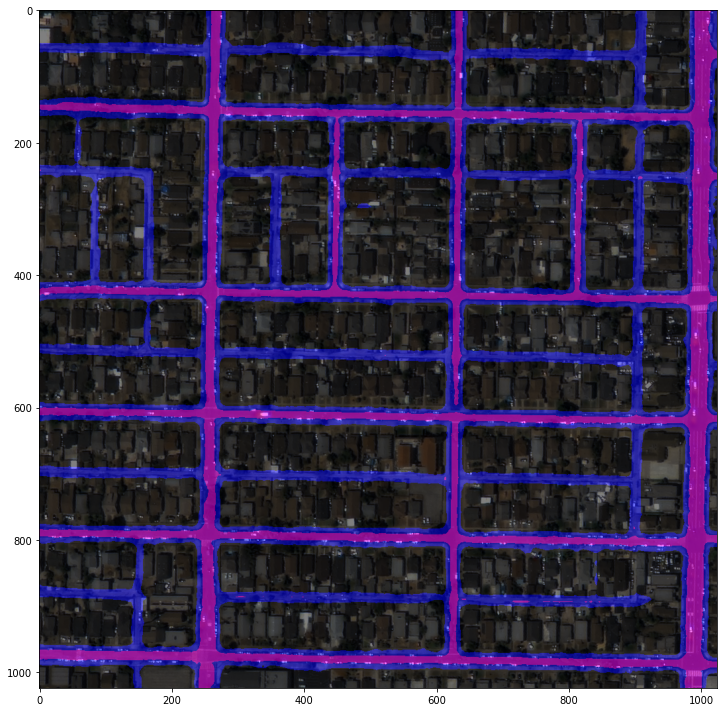

In [ ]:
checkpoint_file = '/content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/iter_10000.pth'  # 학습된 가중치 파일

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_segmentor(cfg, checkpoint_file, device='cuda:0')  #cuda gpu 사용

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD11474_PS3_K3A_NIA0390.png') # inference할 이미지
result = inference_segmentor(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, palette)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


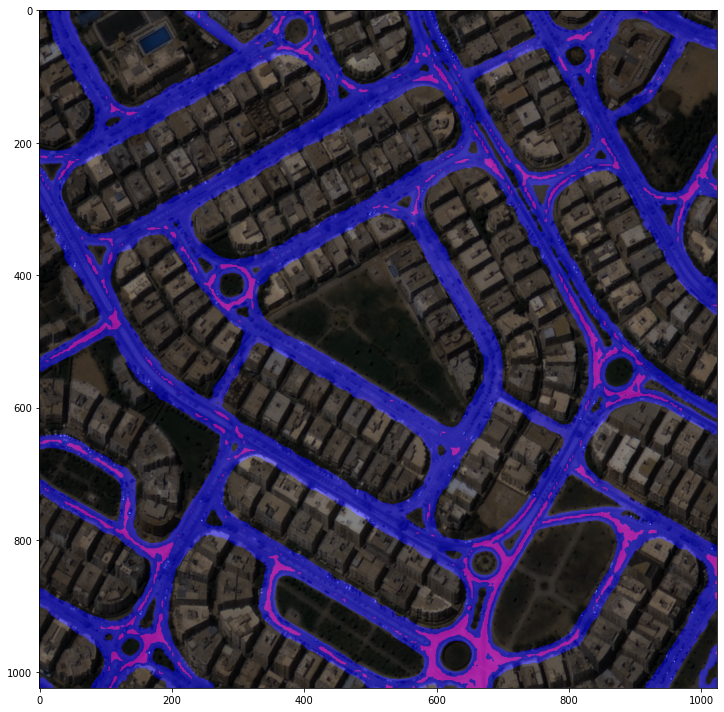

In [ ]:

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD00173_PS3_K3A_NIA0276.png') # inference할 이미지
result = inference_segmentor(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, palette)

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: /content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/iter_10000.pth


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


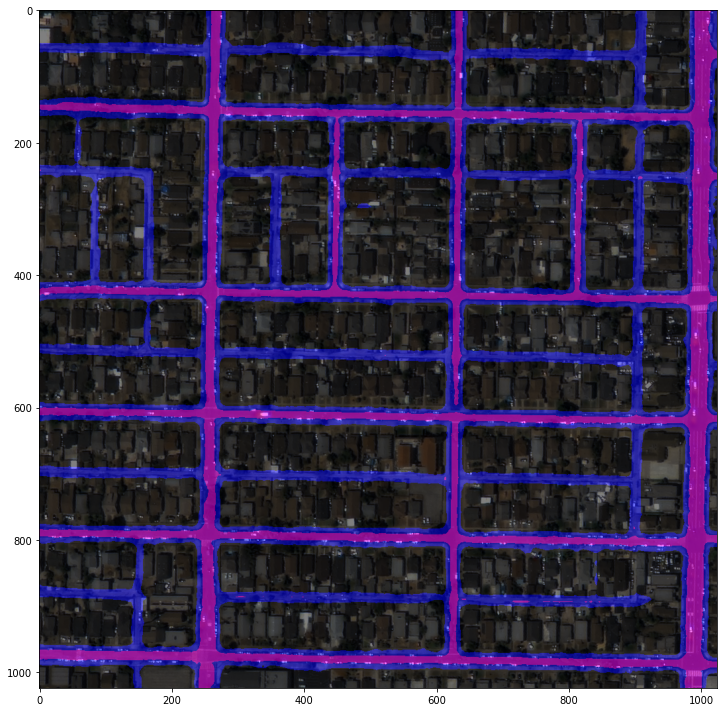

In [ ]:
checkpoint_file = '/content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/iter_10000.pth'  # 학습된 가중치 파일

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_segmentor(cfg, checkpoint_file, device='cuda:0')  #cuda gpu 사용

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD11474_PS3_K3A_NIA0390.png') # inference할 이미지
result = inference_segmentor(model_ckpt,img)
show_result_pyplot(model_ckpt, img,result, palette)

In [ ]:
import torch, torchvision

import mmseg
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset
from mmseg.apis import set_random_seed

import mmcv
from mmcv import Config

import matplotlib.pyplot as plt
import os.path as osp
import glob
import numpy as np
from PIL import Image

In [ ]:
from mmseg.datasets import (build_dataloader, build_dataset)

# test용 Dataset과 DataLoader 생성. 
# build_dataset()호출 시 list로 감싸지 않는 것이 train용 dataset 생성시와 차이. 
dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(
        dataset,
        # 반드시 아래 samples_per_gpu 인자값은 1로 설정
        #samples_per_gpu=cfg.data.samples_per_gpu,
        #workers_per_gpu=cfg.data.workers_per_gpu,
        samples_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)

2022-05-25 08:44:26,406 - mmseg - INFO - Loaded 127 images


In [ ]:
from mmseg.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
#from mmseg.apis import inference_detector, init_detector, show_result_pyplot

model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])

In [ ]:
# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함. 
# 위에서 만든 /content/show_test_output 디렉토리에 interence 결과가 시각화된 이미지가 저장됨. 
outputs = single_gpu_test(model_ckpt, data_loader, False, '/content/test', 0.9)

In [ ]:
metric = dataset.evaluate(outputs, metric='mIoU')
print(metric)

per class results:

+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.06 | 95.46 |
|    road    | 49.23 | 60.37 |
|  contour   | 43.12 | 69.23 |
+------------+-------+-------+
Summary:

+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 91.14 | 61.8 | 75.02 |
+-------+------+-------+
{'aAcc': 0.9114, 'mIoU': 0.618, 'mAcc': 0.7502, 'IoU.background': 0.9306, 'IoU.road': 0.49229999999999996, 'IoU.contour': 0.43119999999999997, 'Acc.background': 0.9545999999999999, 'Acc.road': 0.6037, 'Acc.contour': 0.6923}


In [ ]:
# # convert dataset annotation to semantic segmentation map
# data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road'
# img_dir = 'image'
# ann_dir = 'contoured_wo5'

# define class and plaette for better visualization
classes = ('background', 'road')
palette = [[0, 0, 0], [255, 0, 255]]

In [ ]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module(force=True)
class RoadSemanticSegmentation(CustomDataset):
    CLASSES = classes
    PALETTE = palette
    def __init__(self, split, **kwargs):
        super().__init__(img_suffix='.png', seg_map_suffix='.png', split=split, **kwargs)
        assert osp.exists(self.img_dir) and self.split is not None

In [ ]:
from mmseg.apis import set_random_seed

# add CLASSES and PALETTE to checkpoint
cfg.checkpoint_config.meta = dict(
    CLASSES=classes,
    PALETTE=palette)

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
#cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg

# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 3

# modify loss function crossentropy
cfg.model.decode_head.loss_decode = dict(type='CrossEntropyLoss', class_weight=[1, 2, 3], use_sigmoid=False, loss_weight=1.0)

#cfg.model.test_cfg.mode = 'whole'
#del cfg['model']['test_cfg']['crop_size']
#del cfg['model']['test_cfg']['stride']

# Modify dataset type and path
cfg.dataset_type = 'RoadSemanticSegmentation'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 4
cfg.data.workers_per_gpu = 4


# Albumentations transforms settings
albu_train_transforms = [
    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomRotate90', p=1.0)
    ], p=0.5),

    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomBrightnessContrast',brightness_limit=0.1, contrast_limit=0.15, p=1.0),
        dict(type='CLAHE', clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=1.0),
        dict(type='HueSaturationValue', hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=10, p=1.0),
    ], p=0.5)
]

# pipline
cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (512, 512)
# cfg.image_scale = (512, 512)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.5, 1.5)),
    # dict(type='Resize', keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='Albu',
        transforms=albu_train_transforms,
        keymap=dict(img='image', gt_semantic_seg='mask'),
        update_pad_shape=True,
        ),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=(512,512), pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),            
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/road/'
cfg.data.train.img_dir = 'image'
cfg.data.train.ann_dir = 'contoured_wo5'
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'split/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.val.img_dir = 'image'
cfg.data.val.ann_dir = 'annotation'
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'split/validation.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/road/'
cfg.data.test.img_dir = 'image'
cfg.data.test.ann_dir = 'annotation'
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'split/validation.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = save_pth_path

cfg.runner.max_iters = 10000
cfg.log_config.interval = 10
cfg.evaluation.interval = 200
cfg.evaluation.save_best = 'mIoU'
cfg.checkpoint_config.interval = 2000

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained=None,
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=64,
        num_stages=4,
        num_layers=[3, 6, 40, 3],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1,
        init_cfg=dict(type='Pretrained', checkpoint='pretrain/mit_b5.pth')),
    decode_head=dict(
        type='SegformerHead',
        in_channels=[64, 128, 320, 512],
        in_index=[0, 1, 2, 3],
        channels=256,
        dropout_ratio=0.1,
        num_classes=3,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss',
            class_weight=[1, 2, 3],
            use

In [ ]:
# Build the detector
model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

# Add an attribute for visualization convenience
# model.CLASSES = datasets[0].CLASSES

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


In [ ]:
model.cfg = cfg

In [ ]:
outnews = []
files = glob.glob('/content/drive/Shareddrives/msmg/road_seg_ngjw/inference_npy/*.npy')
for file_name in files :
  outnews.append(file_name)



In [ ]:
checkpoint_file = '/content/drive/Shareddrives/msmg/road_seg_ngjw/src/no2_segformer_ce_iter10000_checkpoint/iter_10000.pth'  # 학습된 가중치 파일

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_segmentor(cfg, checkpoint_file, device='cuda:0')  #cuda gpu 사용

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/road/image/BLD11474_PS3_K3A_NIA0390.png') # inference할 이미지
result = inference_segmentor(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, palette)

In [ ]:
metric = dataset.evaluate(outnews, metric='mIoU')
print(metric)

per class results:

+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 76.11 | 83.82 |
|    road    |  7.04 | 16.44 |
+------------+-------+-------+
Summary:

+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 76.54 | 41.58 | 50.13 |
+-------+-------+-------+
{'aAcc': 0.7654000000000001, 'mIoU': 0.4158, 'mAcc': 0.5013000000000001, 'IoU.background': 0.7611, 'IoU.road': 0.0704, 'Acc.background': 0.8382, 'Acc.road': 0.16440000000000002}
